In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('../datasets/train.csv')
df.head()

,id,DC024,DC025,DC205,DC206,DC207,DC208,DC209,DC210,DC211,...,DC237f,DC241,DC242,DC244,DC246,DC252,DC270a,DC109,DC142a,DC201
0,1,11,2,16.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,2.0,1,12.0,60.0,Layak Minum
1,2,11,2,31.0,1.0,0.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,1.0,1.0,1.0,2,31.0,70.0,Layak Minum
2,3,11,2,12.0,1.0,0.0,1.0,1.0,1.0,1.0,...,0.0,1.0,0.0,1.0,1.0,0.0,4,11.0,75.0,Layak Minum
3,6,11,2,12.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,2.0,NaN,1.0,0.0,1.0,1,11.0,85.0,Layak Minum
4,7,11,2,12.0,1.0,0.0,1.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,2,11.0,65.0,Layak Minum


In [3]:
target = 'DC201'

df = df.drop('id', axis=1)
df[target].replace(to_replace={'Layak Minum':1, 'Tidak Layak Minum':0}, inplace=True)

In [4]:
NUMERICAL_DATA = ['DC216', 'DC220', 'DC142a']
CATEGORICAL_DATA = [column for column in df.columns if column != target and column not in NUMERICAL_DATA]

COLUMN_CATEGORICAL_INDEX = []

for column in CATEGORICAL_DATA:
    COLUMN_CATEGORICAL_INDEX.append(df.columns.get_loc(column))

In [5]:
for column in CATEGORICAL_DATA:
  print('column:', column, df[column].value_counts())

column: DC024 DC024
32    3513
35    3016
33    2701
53    1856
12    1743
11    1609
81    1290
73    1280
31    1262
52    1122
76    1071
64    1067
36    1043
74     946
18     879
72     841
16     833
21     822
13     810
82     763
51     719
61     674
63     648
14     648
17     580
19     531
34     517
15     492
94     472
75     465
62     463
71     453
65     431
91     413
Name: count, dtype: int64
column: DC025 DC025
1    19116
2    16857
Name: count, dtype: int64
column: DC205 DC205
12.0    25224
31.0     3576
17.0     3067
16.0     2815
21.0     1262
96.0       18
Name: count, dtype: int64
column: DC206 DC206
1.0    34517
0.0     1435
Name: count, dtype: int64
column: DC207 DC207
0.0    29130
1.0     6799
Name: count, dtype: int64
column: DC208 DC208
1.0    30453
0.0     5507
Name: count, dtype: int64
column: DC209 DC209
1.0    20474
0.0    15481
Name: count, dtype: int64
column: DC210 DC210
0.0    24193
1.0    11739
Name: count, dtype: int64
column: DC211 DC211
1.

In [6]:
df.isna().sum()

DC024         0
DC025         0
DC205        11
DC206        21
DC207        44
DC208        13
DC209        18
DC210        41
DC211        24
DC212        24
DC213        77
DC214         9
DC215        14
DC216        39
DC217         0
DC219         0
DC220         4
DC226         6
DC230a       11
DC230b     3009
DC232      3024
DC232b     3024
DC235     10446
DC237        21
DC237a       37
DC237b       37
DC237c       37
DC237d       37
DC237e       37
DC237f       37
DC241       612
DC242      5374
DC244         4
DC246         9
DC252        14
DC270a        0
DC109        11
DC142a       52
DC201         3
dtype: int64

In [7]:
print(df['DC235'].value_counts())
print(df['DC235'].isna().sum())

DC235
3.0    8811
1.0    8479
2.0    8237
Name: count, dtype: int64
10446


In [8]:
print(df['DC230b'].value_counts())
print(df['DC230b'].isna().sum())

DC230b
1.0    32166
0.0      798
Name: count, dtype: int64
3009


In [9]:
print(df['DC232'].value_counts())
print(df['DC232'].isna().sum())

DC232
1.0    30741
0.0     2208
Name: count, dtype: int64
3024


In [10]:
print(df['DC232b'].value_counts())
print(df['DC232b'].isna().sum())

DC232b
0.0    32746
1.0      203
Name: count, dtype: int64
3024


In [11]:
print(df['DC241'].value_counts())
print(df['DC241'].isna().sum())

DC241
1.0    30665
2.0     3488
3.0     1204
6.0        4
Name: count, dtype: int64
612


In [12]:
print(df['DC242'].value_counts())
print(df['DC242'].isna().sum())

DC242
1.0    25303
0.0     5296
Name: count, dtype: int64
5374


In [13]:
df[NUMERICAL_DATA].isna().sum()

DC216     39
DC220      4
DC142a    52
dtype: int64

In [14]:
temp_num_df = df[NUMERICAL_DATA].dropna()
temp_num_df

,DC216,DC220,DC142a
0,1.0,80.0,60.0
1,2.0,44.0,70.0
2,2.0,35.0,75.0
3,3.0,79.0,85.0
4,2.0,37.0,65.0
...,...,...,...
35968,1.0,21.0,9.0
35969,1.0,41.0,12.0
35970,2.0,52.0,48.0
35971,2.0,58.0,39.0


(0.0, 200.0)

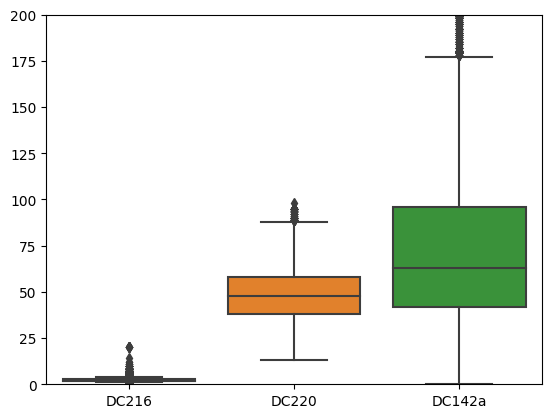

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

# scaler = MinMaxScaler()
# temp_num_df = scaler.fit_transform(temp_num_df)
# temp_num_df = pd.DataFrame(temp_num_df, columns=NUMERICAL_DATA)

ax = sns.boxplot(temp_num_df)
ax.set_ylim([0, 200])

In [16]:
import numpy as np

# Calculate the quartiles
Q1 = np.percentile(temp_num_df['DC142a'], 25)
Q3 = np.percentile(temp_num_df['DC142a'], 75)

# Calculate the interquartile range
IQR = Q3 - Q1

# Calculate the whisker values
lower_whisker = Q1 - 1.5 * IQR
upper_whisker = Q3 + 1.5 * IQR

# Count the number of outliers
n_outliers = np.sum((temp_num_df['DC142a'] < lower_whisker) | (temp_num_df['DC142a'] > upper_whisker))

temp_num_df_no_outlier = temp_num_df[(temp_num_df['DC142a'] >= lower_whisker) & (temp_num_df['DC142a'] <= upper_whisker)]

In [17]:
def drop_outliers(data: pd.DataFrame, column: str):
  # Calculate the quartiles
  Q1 = np.percentile(data[column], 25)
  Q3 = np.percentile(data[column], 75)

  # Calculate the interquartile range
  IQR = Q3 - Q1

  # Calculate the whisker values
  lower_whisker = Q1 - 1.5 * IQR
  upper_whisker = Q3 + 1.5 * IQR

  # Count the number of outliers
  n_outliers = np.sum((data[column] < lower_whisker) | (data[column] > upper_whisker))
  print('num of outliers:', n_outliers)

  data_no_outlier = data[(data[column] >= lower_whisker) & (data[column] <= upper_whisker)]
  
  return data_no_outlier

In [57]:
test = temp_num_df.copy()

for column in NUMERICAL_DATA:
  test = drop_outliers(test, column)



num of outliers: 1329
num of outliers: 199
num of outliers: 1799


(0.0, 200.0)

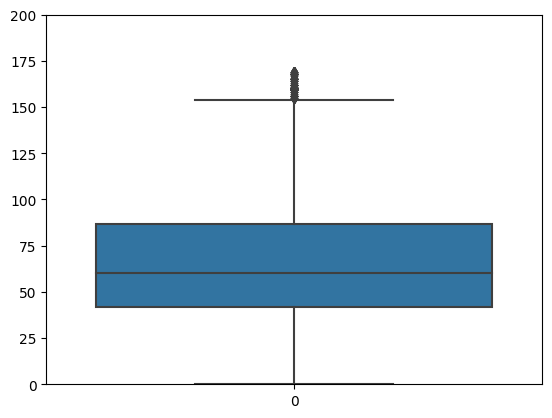

In [58]:
ax = sns.boxplot(test['DC142a'])
ax.set_ylim([0, 200])

In [59]:
len(test)

32553

(0.0, 200.0)

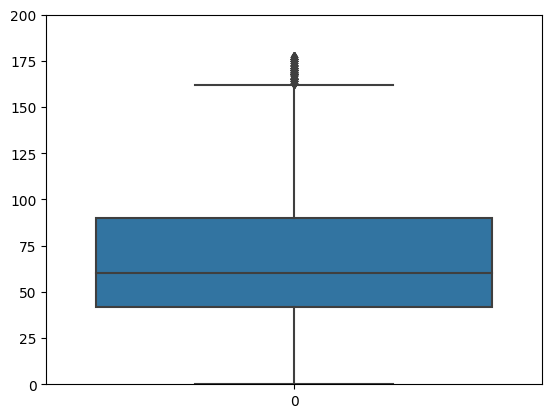

In [60]:
ax = sns.boxplot(temp_num_df_no_outlier['DC142a'])
ax.set_ylim([0, 200])

In [61]:
n_outliers

2084

In [62]:
temp_num_df.describe()

,DC216,DC220,DC142a
count,35880.000000,35880.000000,35880.000000
mean,2.323328,48.477118,82.629236
std,1.105188,13.715199,91.062892
min,0.000000,13.000000,0.000000
25%,2.000000,38.000000,42.000000
50%,2.000000,48.000000,63.000000
75%,3.000000,58.000000,96.000000
max,20.000000,98.000000,998.000000
